# Maintaining Diagonal Symmetry

My Busse CE2 runs are crashing at high Rayleigh number. This may be related to losing diagonal symmetry of the second cumulants, which by definition must be symmetric matrices in the $(y_1, y_2)$ plane.

Here, we have a look at how diagonal symmetry is lost simply by transforming to and from coefficient space. 

In [1]:
%matplotlib notebook
import dedalus.public as de
import numpy as np
import matplotlib.pyplot as plt

As our interest is the Busse problem, we will use parity bases.

In [2]:
ny = 256

In [3]:
y1 = de.SinCos('y1',ny)
y2 = de.SinCos('y2',ny)

In [4]:
dom = de.Domain([y1, y2], grid_dtype='float')

In [5]:
f = dom.new_field()
f.meta['y1']['parity'] = -1
f.meta['y2']['parity'] = -1

A quick and easy way to make a symmetric matrix is simply to add a square matrix to its own transpose. Here, we use some random numbers.

In [6]:
gshape = dom.global_grid_shape()
data = np.random.randn(*gshape)

In [7]:
f['g'] = data + data.T

Let's confirm that the data is actually symmetric by plotting the difference between it and its transform:

<IPython.core.display.Javascript object>


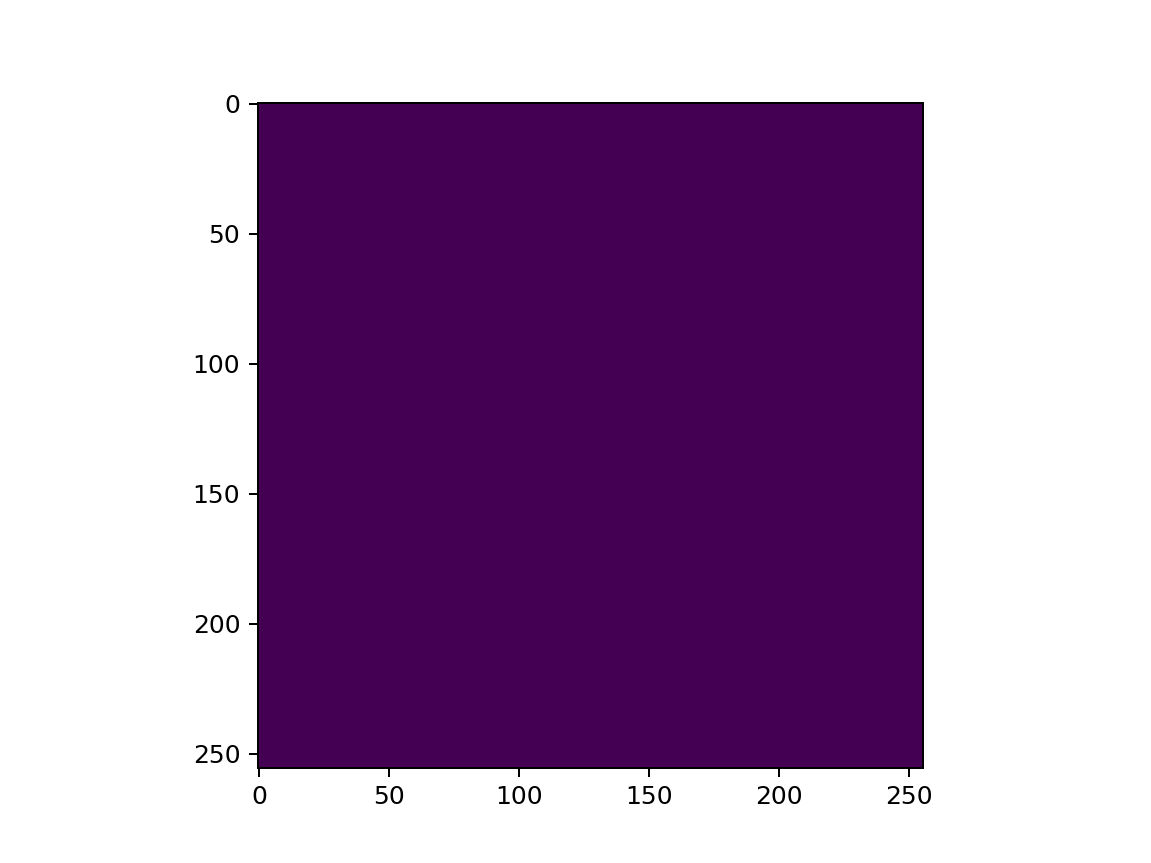

In [8]:
plt.figure()
plt.imshow(f['g'] - f['g'])

Let's do the same for the coefficients, which should also be symmetric. Here, I use the abs of the difference anticipating that these will be complex numbers. They're not here, because we're looking at two sin/cos, but eventually I want to look at the $(y_1, y_2)$ plane of every $\xi$ mode in $c_{\theta \theta}(\xi, y_1, y_2)$.

<IPython.core.display.Javascript object>


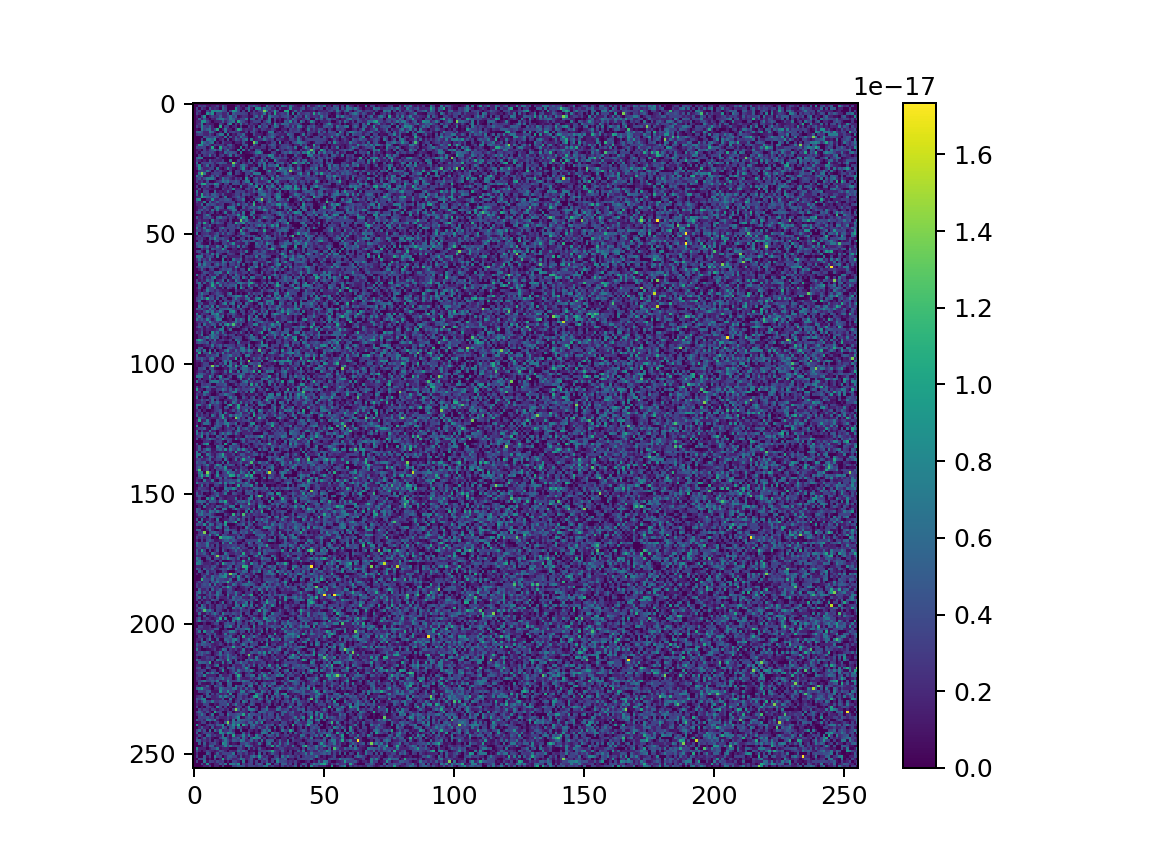

In [9]:
plt.figure()
plt.imshow(np.abs(f['c'] - f['c'].T))
plt.colorbar()

We see that while the coefficient space shows noise at $\sim 10^{-17}$, an effect of the transform.

Now, let's do this a lot of times, and look at the growth of the $L_\infty$ norm of $f - f^T$ for both grid points and coefficients.

In [10]:
niter = 100

grid_linf = []
coef_linf = []

In [11]:
for i in range(niter):
    grid_linf.append(np.max(np.abs(f['g'] - f['g'].T)))
    coef_linf.append(np.max(np.abs(f['c'] - f['c'].T)))

<IPython.core.display.Javascript object>


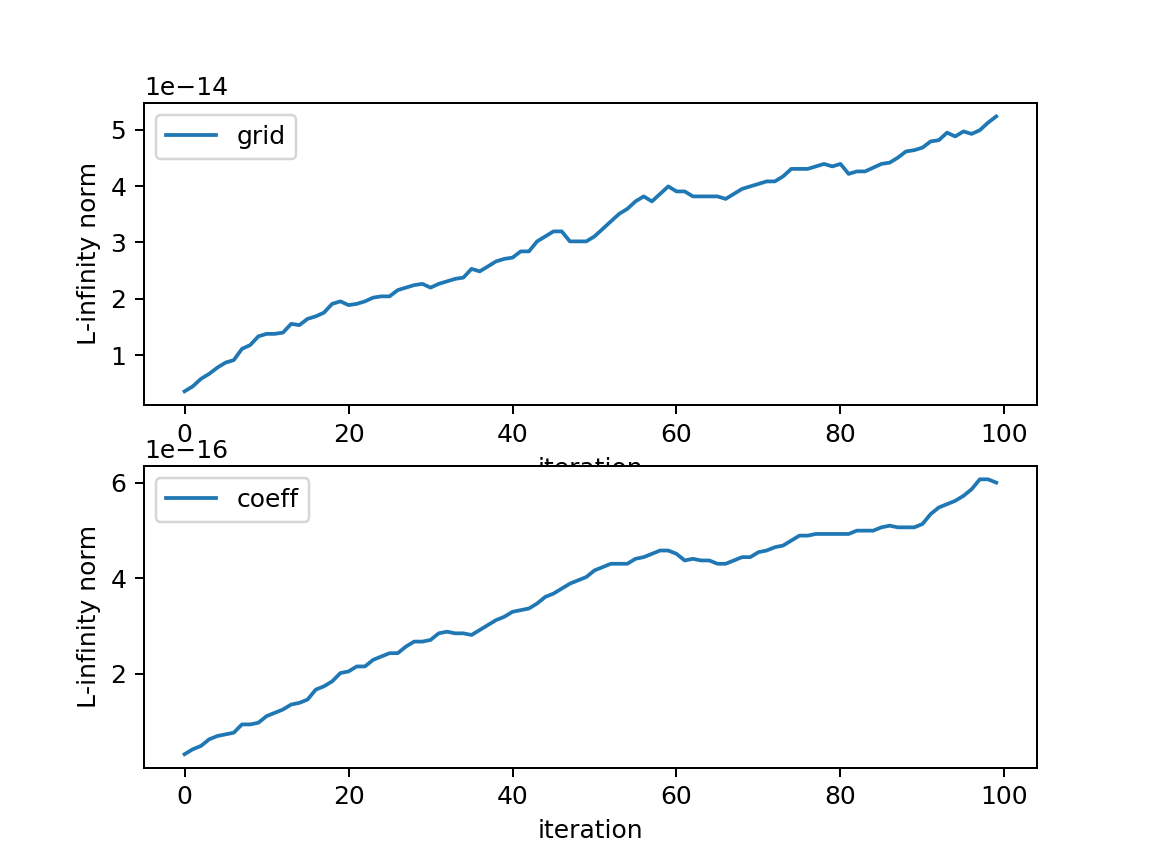

In [12]:
plt.figure()
plt.subplot(211)
plt.plot(grid_linf,label='grid')
plt.xlabel("iteration")
plt.ylabel("L-infinity norm")
plt.legend(loc='upper left')
plt.subplot(212)
plt.plot(coef_linf, label='coeff')
plt.xlabel("iteration")
plt.ylabel("L-infinity norm")
plt.legend(loc='upper left')

So, it looks like the error grows linearly with the number of tranforms.

## What to do about it?